In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('daily-total-female-births.csv')

In [4]:
df.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [5]:
df.tail()

,Date,Births
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55
364,1959-12-31,50


In [7]:
Date = pd.date_range(start='01/01/1959', end='12/31/1959',freq='D')
Date

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [8]:
df['Time_Stamp'] = pd.DataFrame(Date)
df.head()

,Date,Births,Time_Stamp
0,1959-01-01,35,1959-01-01
1,1959-01-02,32,1959-01-02
2,1959-01-03,30,1959-01-03
3,1959-01-04,31,1959-01-04
4,1959-01-05,44,1959-01-05


In [10]:
df.drop('Date',axis=1,inplace=True)
df.head()

,Births,Time_Stamp
0,35,1959-01-01
1,32,1959-01-02
2,30,1959-01-03
3,31,1959-01-04
4,44,1959-01-05


In [11]:
df.set_index(keys='Time_Stamp',inplace=True)
df.head()

,Births
Time_Stamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

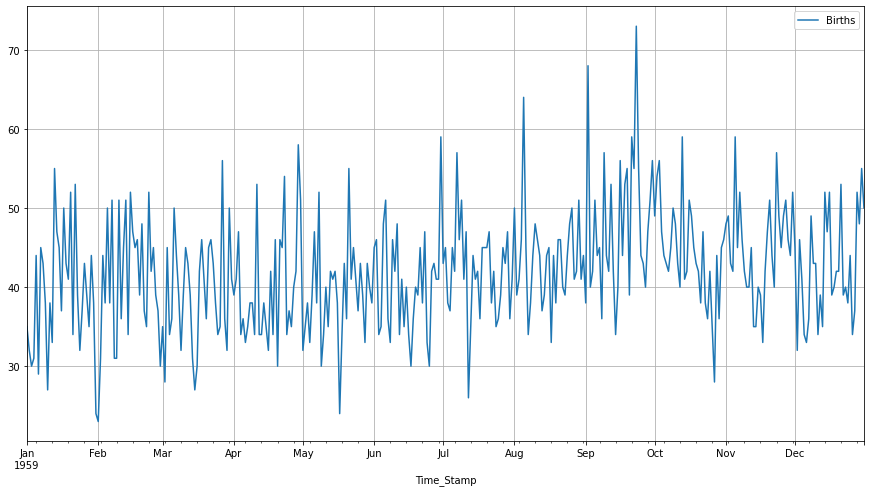

In [14]:
df.plot(grid=True);

In [15]:
df.describe()

,Births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [16]:
train = df[0:int(len(df)*0.7)]
test = df[int(len(df)*0.7):]

In [17]:
train.head()

,Births
Time_Stamp,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [18]:
train.tail()

,Births
Time_Stamp,
1959-09-08,36
1959-09-09,57
1959-09-10,44
1959-09-11,42
1959-09-12,53


In [19]:
test.head()

,Births
Time_Stamp,
1959-09-13,42
1959-09-14,34
1959-09-15,40
1959-09-16,56
1959-09-17,44


In [20]:
test.tail()

,Births
Time_Stamp,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [22]:
train.shape

(255, 1)

In [23]:
test.shape

(110, 1)

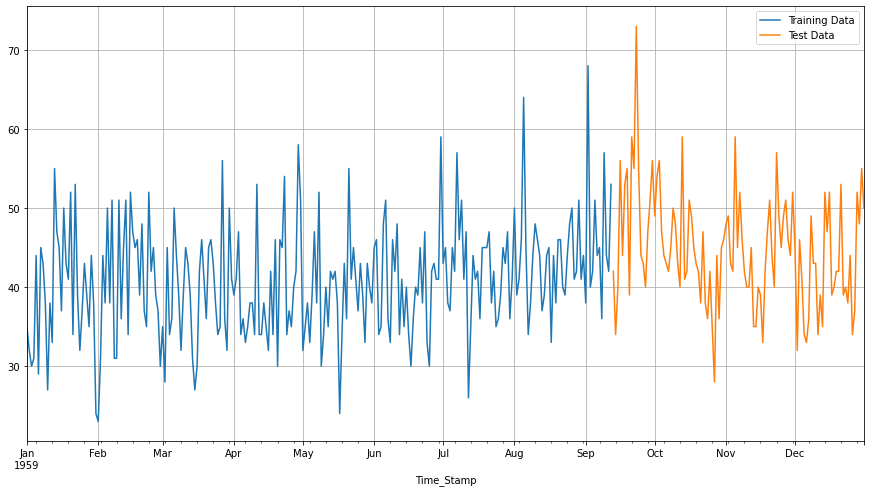

In [30]:
train['Births'].plot()
test['Births'].plot()
plt.grid()
plt.legend(['Training Data','Test Data']);

In [35]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]

In [36]:
print(train_time)
print(test_time)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [37]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [38]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

In [39]:
LinearRegression_train.head()

,Births,time
Time_Stamp,,
1959-01-01,35,1
1959-01-02,32,2
1959-01-03,30,3
1959-01-04,31,4
1959-01-05,44,5


In [40]:
LinearRegression_test.head()

,Births,time
Time_Stamp,,
1959-09-13,42,256
1959-09-14,34,257
1959-09-15,40,258
1959-09-16,56,259
1959-09-17,44,260


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
LR = LinearRegression()

In [47]:
LinearRegression_train['Births']

Time_Stamp
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-09-08    36
1959-09-09    57
1959-09-10    44
1959-09-11    42
1959-09-12    53
Name: Births, Length: 255, dtype: int64

In [49]:
LR.fit(LinearRegression_train[['time']],LinearRegression_train['Births'])

LinearRegression()

In [50]:
train_pred_model1 = LR.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_pred_model1
test_pred_model1 = LR.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_pred_model1

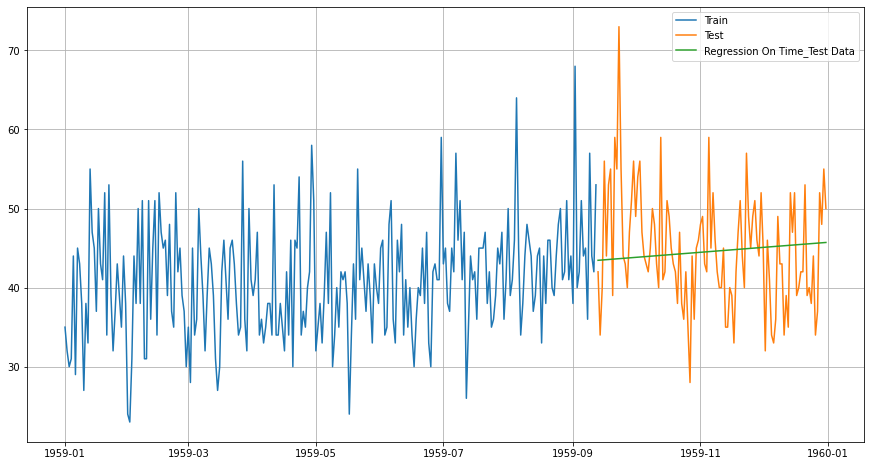

In [52]:
plt.plot(LinearRegression_train['Births'],label='Train');
plt.plot(LinearRegression_test['Births'],label='Test');
plt.plot(LinearRegression_test['RegOnTime'],label='Regression On Time_Test Data')

plt.legend(loc='best');
plt.grid()

In [53]:
from sklearn.metrics import mean_squared_error

In [56]:
rmse_model1_test = mean_squared_error(LinearRegression_test['Births'],LinearRegression_test['RegOnTime'],squared=False)

In [57]:
rmse_model1_test

7.391597058886003

In [61]:
result_df = pd.DataFrame({'TestRMSE':rmse_model1_test},index=['RegressionOnTime'])
result_df

,TestRMSE
RegressionOnTime,7.391597


In [62]:
#Naive

In [63]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [64]:
NaiveModel_train.tail()

,Births
Time_Stamp,
1959-09-08,36
1959-09-09,57
1959-09-10,44
1959-09-11,42
1959-09-12,53


In [65]:
NaiveModel_test['naive'] = 53

In [66]:
NaiveModel_test.head()

,Births,naive
Time_Stamp,,
1959-09-13,42,53
1959-09-14,34,53
1959-09-15,40,53
1959-09-16,56,53
1959-09-17,44,53


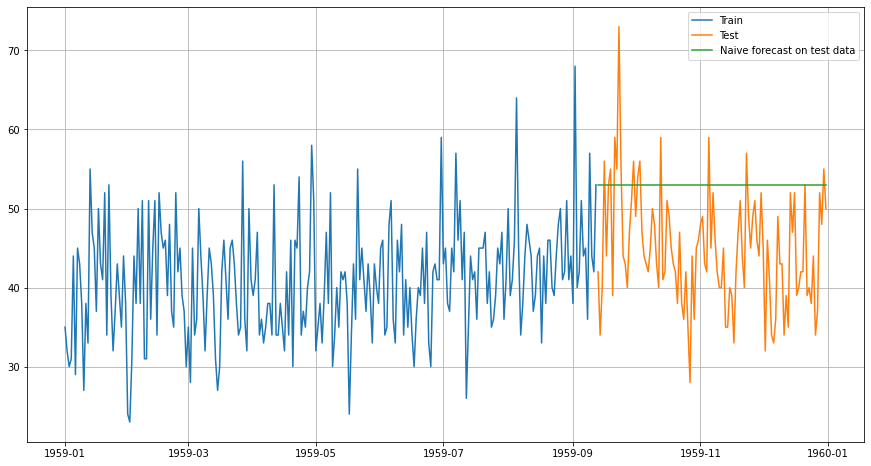

In [67]:
plt.plot(NaiveModel_train['Births'],label='Train');
plt.plot(NaiveModel_test['Births'],label='Test');
plt.plot(NaiveModel_test['naive'],label='Naive forecast on test data')

plt.legend(loc='best');
plt.grid()

In [68]:
rmse_model2_test = mean_squared_error(NaiveModel_test['Births'],NaiveModel_test['naive'],squared=False)
rmse_model2_test

10.9842862970038

In [69]:
result_df2 = pd.DataFrame({'TestRMSE':rmse_model2_test},index=['NaiveModel'])
result_df2

,TestRMSE
NaiveModel,10.984286


In [71]:
result_df = pd.concat([result_df,result_df2])
result_df

,TestRMSE
RegressionOnTime,7.391597
NaiveModel,10.984286


In [72]:
#Simple Average

In [73]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [74]:
SimpleAverage_test['mean_forecast'] = SimpleAverage_train['Births'].mean()
SimpleAverage_test.head()

,Births,mean_forecast
Time_Stamp,,
1959-09-13,42,40.803922
1959-09-14,34,40.803922
1959-09-15,40,40.803922
1959-09-16,56,40.803922
1959-09-17,44,40.803922


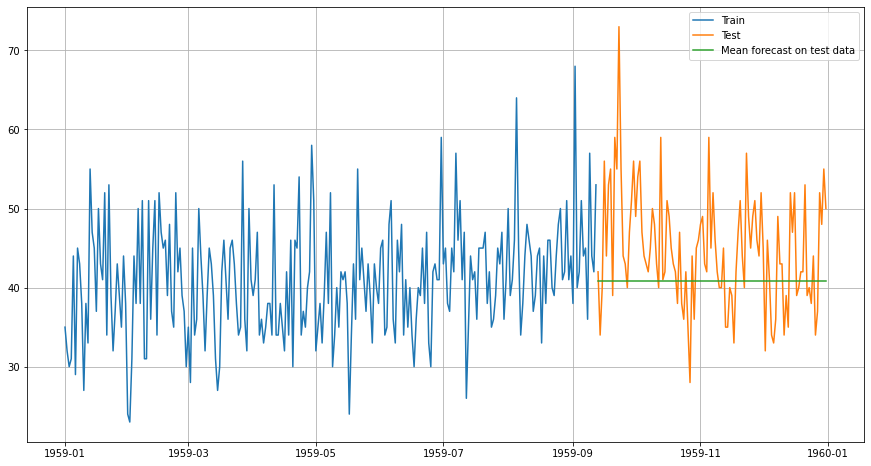

In [75]:
plt.plot(SimpleAverage_train['Births'],label='Train');
plt.plot(SimpleAverage_test['Births'],label='Test');
plt.plot(SimpleAverage_test['mean_forecast'],label='Mean forecast on test data')

plt.legend(loc='best');
plt.grid()

In [76]:
rmse_model3_test = mean_squared_error(SimpleAverage_test['Births'],SimpleAverage_test['mean_forecast'],squared=False)
rmse_model3_test

8.195469448330721

In [77]:
result_df3 = pd.DataFrame({'TestRMSE':rmse_model3_test},index=['SimpleAverageModel'])
result_df3

,TestRMSE
SimpleAverageModel,8.195469


In [78]:
result_df = pd.concat([result_df,result_df3])
result_df

,TestRMSE
RegressionOnTime,7.391597
NaiveModel,10.984286
SimpleAverageModel,8.195469


### Moving Average

In [79]:
MovingAverage = df.copy()

In [80]:
MovingAverage['Trailing_2'] = MovingAverage['Births'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Births'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Births'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Births'].rolling(9).mean()

MovingAverage.head()

,Births,Trailing_2,Trailing_4,Trailing_6,Trailing_9
Time_Stamp,,,,,
1959-01-01,35,NaN,NaN,NaN,NaN
1959-01-02,32,33.5,NaN,NaN,NaN
1959-01-03,30,31.0,NaN,NaN,NaN
1959-01-04,31,30.5,32.00,NaN,NaN
1959-01-05,44,37.5,34.25,NaN,NaN


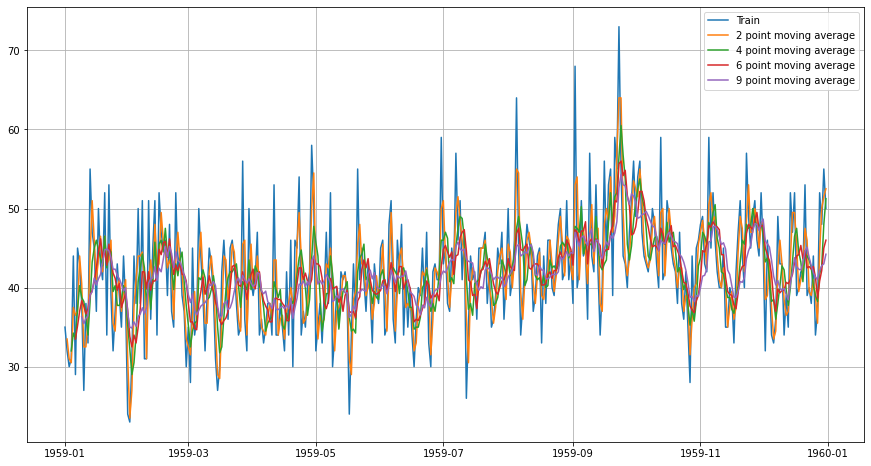

In [82]:
plt.plot(MovingAverage['Births'],label='Train');
plt.plot(MovingAverage['Trailing_2'],label='2 point moving average');
plt.plot(MovingAverage['Trailing_4'],label='4 point moving average');
plt.plot(MovingAverage['Trailing_6'],label='6 point moving average');
plt.plot(MovingAverage['Trailing_9'],label='9 point moving average');

plt.legend(loc='best');
plt.grid()

In [83]:
MovingAverage_train = MovingAverage[0:int(len(MovingAverage)*0.7)]
MovingAverage_test = MovingAverage[int(len(MovingAverage)*0.7):]

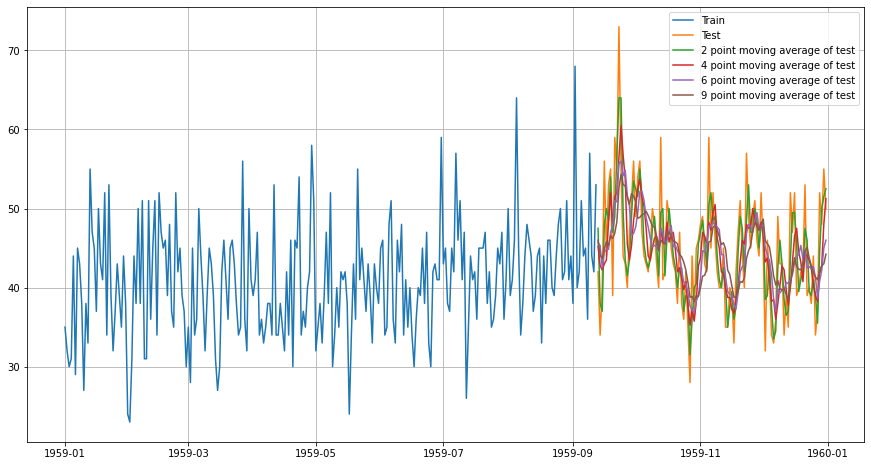

In [84]:
plt.plot(MovingAverage_train['Births'],label='Train');
plt.plot(MovingAverage_test['Births'],label='Test');
plt.plot(MovingAverage_test['Trailing_2'],label='2 point moving average of test');
plt.plot(MovingAverage_test['Trailing_4'],label='4 point moving average of test');
plt.plot(MovingAverage_test['Trailing_6'],label='6 point moving average of test');
plt.plot(MovingAverage_test['Trailing_9'],label='9 point moving average of test');

plt.legend(loc='best');
plt.grid()

In [85]:
rmse_model4_test_rolling2 = mean_squared_error(MovingAverage_test['Births'],MovingAverage_test['Trailing_2'],squared=False)
rmse_model4_test_rolling4 = mean_squared_error(MovingAverage_test['Births'],MovingAverage_test['Trailing_4'],squared=False)
rmse_model4_test_rolling6 = mean_squared_error(MovingAverage_test['Births'],MovingAverage_test['Trailing_6'],squared=False)
rmse_model4_test_rolling9 = mean_squared_error(MovingAverage_test['Births'],MovingAverage_test['Trailing_9'],squared=False)

In [90]:
result_df4 = pd.DataFrame({'TestRMSE': [rmse_model4_test_rolling2,rmse_model4_test_rolling4
                                          ,rmse_model4_test_rolling6,rmse_model4_test_rolling9]}
                           ,index=['2pointTrailingMovingAverage','4pointTrailingMovingAverage'
                                   ,'6pointTrailingMovingAverage','9pointTrailingMovingAverage'])

In [91]:
result_df4

,TestRMSE
2pointTrailingMovingAverage,4.157961
4pointTrailingMovingAverage,5.531470
6pointTrailingMovingAverage,6.109316
9pointTrailingMovingAverage,6.502145


In [92]:
result_df = pd.concat([result_df,result_df4])
result_df

,TestRMSE
RegressionOnTime,7.391597
NaiveModel,10.984286
SimpleAverageModel,8.195469
2pointTrailingMovingAverage,4.157961
4pointTrailingMovingAverage,5.531470
6pointTrailingMovingAverage,6.109316
9pointTrailingMovingAverage,6.502145


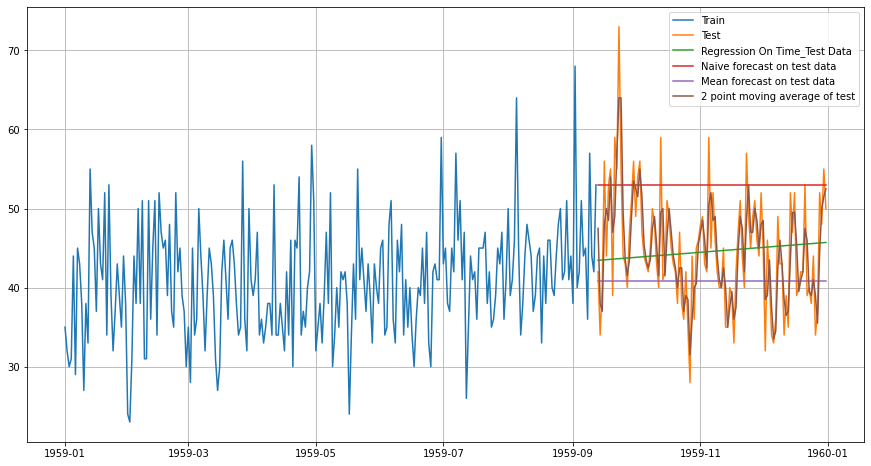

In [94]:
plt.plot(train['Births'], label='Train')
plt.plot(test['Births'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'],label='Regression On Time_Test Data')
plt.plot(NaiveModel_test['naive'],label='Naive forecast on test data')
plt.plot(SimpleAverage_test['mean_forecast'],label='Mean forecast on test data')
plt.plot(MovingAverage_test['Trailing_2'],label='2 point moving average of test');


plt.legend(loc='best');
plt.grid()